# Rain in Australia

In [5]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Exibindo o dataset

In [6]:
data = pd.read_csv('weatherAUS.csv')
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [7]:
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 142193 | Colunas: 24'

# Removendo dados nulos

In [8]:
data = data.dropna()
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0.0,No
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0.0,No
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,0.0,No
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0.0,No
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,0.0,No


In [9]:
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 56420 | Colunas: 24'

# Verificando balanceamento dos dados

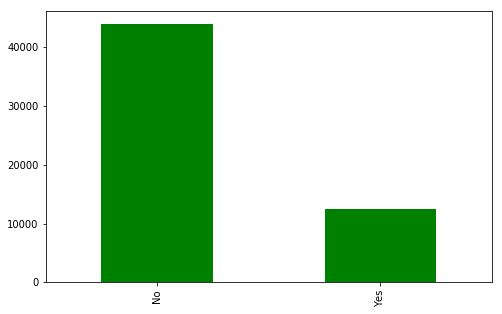

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

counts = data['RainTomorrow'].value_counts()
counts.plot.bar(color='green', ax=ax, grid=False)

In [11]:
rain_tomorrow = list(data.RainTomorrow)

yes, no = 0, 0

for instance in rain_tomorrow:
    if (instance == "Yes"):
        yes += 1
    no += 1
    
print("yes:", yes)
print("no:", no)

yes: 12427
no: 56420


# Lidando com variáveis categóricas

In [12]:
# Antes da transformação

print('Wind gust direction:')
data.WindGustDir.unique()

Wind gust direction:


array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [13]:
# Antes da transformação

print('Wind gust direction at 9am:')
data.WindDir9am.unique()

Wind gust direction at 9am:


array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [14]:
# Antes da transformação

print('Rain Today:')
data.RainToday.unique()

Rain Today:


array(['No', 'Yes'], dtype=object)

In [15]:
# Antes da transformação

print('Rain Tomorrow:')
data.RainTomorrow.unique()

Rain Tomorrow:


array(['No', 'Yes'], dtype=object)

In [16]:
label_encoder = LabelEncoder()

data.WindGustDir = label_encoder.fit_transform(data.WindGustDir)
data.WindDir9am = label_encoder.fit_transform(data.WindDir9am)
data.RainToday = label_encoder.fit_transform(data.RainToday)
data.RainTomorrow = label_encoder.fit_transform(data.RainTomorrow)

In [17]:
# Depois da transformação

print('Wind gust direction:')
data.WindGustDir.unique()

Wind gust direction:


array([11,  8,  5, 14,  3,  9,  1,  4,  0, 12, 13, 15,  6,  2, 10,  7])

In [18]:
# Depois da transformação

print('Wind gust direction at 9am:')
data.WindDir9am.unique()

Wind gust direction at 9am:


array([ 1, 10,  5, 14,  7,  3,  8,  9,  4, 13, 11,  0,  6,  2, 15, 12])

In [19]:
# Depois da transformação

print('Rain today:')
data.RainToday.unique()

Rain today:


array([0, 1])

In [20]:
# Depois da transformação

print('Rain tomorrow:')
data.RainTomorrow.unique()

Rain tomorrow:


array([0, 1])

# Dataset após tratamento de variáveis categóricas

In [21]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,3,43.0,3,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0.0,0
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,11,41.0,8,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0.0,0
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,9,37.0,9,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0.0,0
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,1,48.0,1,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0.0,0
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,4,41.0,5,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,0,0.0,0


# Padronizando dados

In [22]:
scaler = StandardScaler()

x_train = data[[
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm',
    'RISK_MM'
]]

scaled = scaler.fit_transform(x_train)

In [39]:
names = [
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm',
    'RISK_MM'
]

data_scaled = pd.DataFrame(scaled, columns=names)
data_scaled.insert(0, 'Date', data['Date'])
data_scaled.insert(15, 'RainToday', data['RainToday'])
data_scaled.insert(16, 'RainTomorrow', data['RainTomorrow'])
data_scaled.head(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainToday,RainTomorrow
0,NaN,0.691208,1.575298,-0.303702,1.757691,1.214537,0.534126,-1.812261,-1.583303,-1.513002,-0.801428,0.254411,1.278186,1.563621,-0.268783,NaN,NaN
1,NaN,0.769131,0.671504,-0.303702,2.515216,1.400800,-0.290764,-2.059824,-0.628068,-0.392322,-1.158937,-1.256603,0.318980,0.627467,-0.268783,NaN,NaN
2,NaN,0.924976,1.919600,-0.303702,1.433038,0.762183,0.384146,-1.366647,-0.714907,-0.814396,-1.158937,0.632165,1.597921,1.783032,-0.268783,NaN,NaN
3,NaN,1.314588,2.034368,-0.303702,1.595364,1.187928,-0.740704,-1.366647,-0.657014,-0.828951,-1.158937,0.254411,1.658823,1.885424,-0.268783,NaN,NaN
4,NaN,1.673032,2.407362,-0.303702,1.541255,0.176784,-0.440744,-1.713236,-0.946479,-1.076373,-1.158937,0.632165,2.343970,2.177972,-0.268783,NaN,NaN
5,NaN,2.124982,1.704411,-0.303702,2.028236,-2.058376,0.159176,-1.515185,-1.380677,-1.076373,1.343622,1.387672,1.902431,1.695268,-0.268783,NaN,NaN
6,NaN,1.532771,1.403147,-0.303702,1.162493,1.294364,0.009196,-1.713236,-0.859640,-0.712516,-0.443920,-1.256603,1.034578,1.285700,-0.268783,NaN,NaN
7,NaN,0.410687,1.431838,-0.303702,2.461107,1.454018,-0.290764,-2.010312,-0.570175,-0.814396,-1.158937,-1.256603,0.379882,1.475856,-0.268783,NaN,NaN
8,NaN,0.862638,1.618336,-0.303702,1.757691,1.214537,0.534126,-1.069571,-1.293837,-1.571219,-1.158937,0.254411,0.790970,1.548993,-0.268783,NaN,NaN
9,NaN,0.971729,1.618336,-0.303702,1.487147,1.320973,0.009196,-1.762748,-1.351730,-1.309242,-1.158937,0.254411,0.882323,1.592876,-0.268783,NaN,NaN
